Result  0


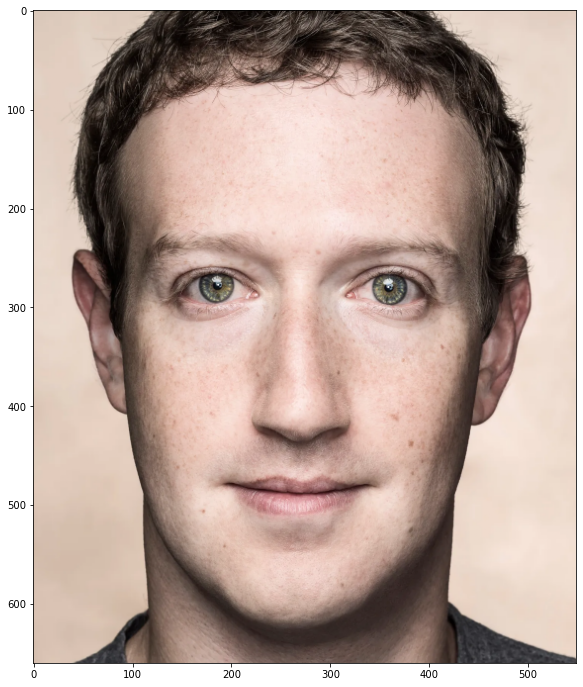

Result  1


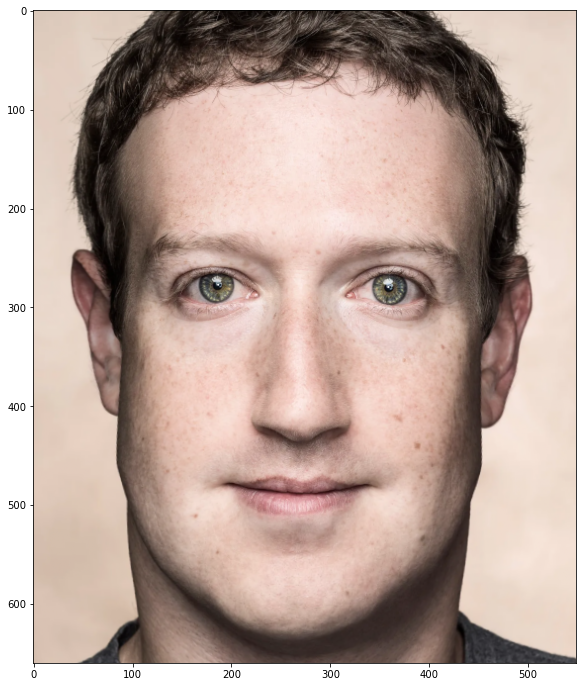

In [11]:
import matplotlib.pyplot as plt

from pychubby.actions import Chubbify, Multiple, Pipeline, Smile, Lambda
from pychubby.detect import LandmarkFace

img_path = '../output/tformed_zucc.jpg'
img = plt.imread(img_path)

lf = LandmarkFace.estimate(img)

for i in range(2):
    a_per_face = Pipeline([Chubbify(0.1*i)])#Smile()])
    a_all = Multiple(a_per_face)

    new_lf, _ = a_all.perform(lf)
    print("Result ", i)
    new_lf.plot(show_landmarks=False, show_numbers=False)

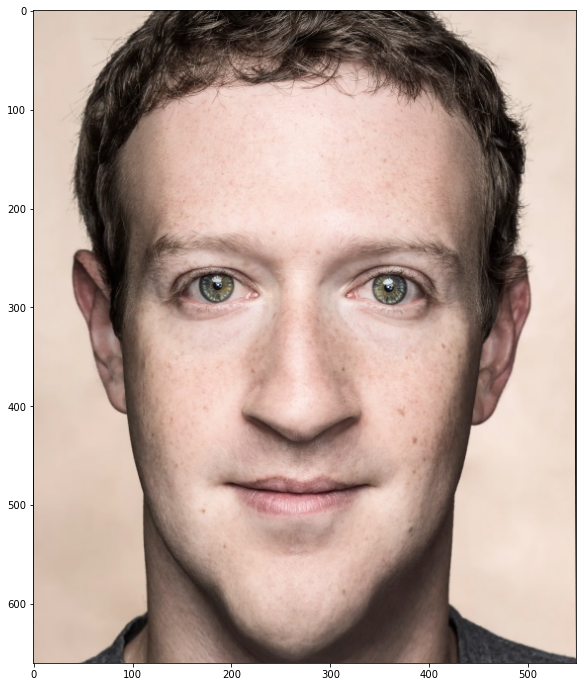

In [6]:
#Implementing a custom action
a_l = Lambda(scale=0.1,
                     specs={'CHIN': (90, 2),
                            'CHIN_L': (110, 1),
                            'CHIN_R': (70, 1),
                            'OUTER_NOSTRIL_L': (-135, 1),
                            'OUTER_NOSTRIL_R': (-45, 1),
                           }
                    )

a_per_face = Pipeline([a_l])
a_all = Multiple(a_per_face)

new_lf2, _ = a_all.perform(lf)
new_lf2.plot(show_landmarks=False, show_numbers=False)

ZUCC mode [click me](https://github.com/jankrepl/pychubby/blob/04d8f66273da6f9bd2f85b740681b56ec5c25ddb/pychubby/actions.py)

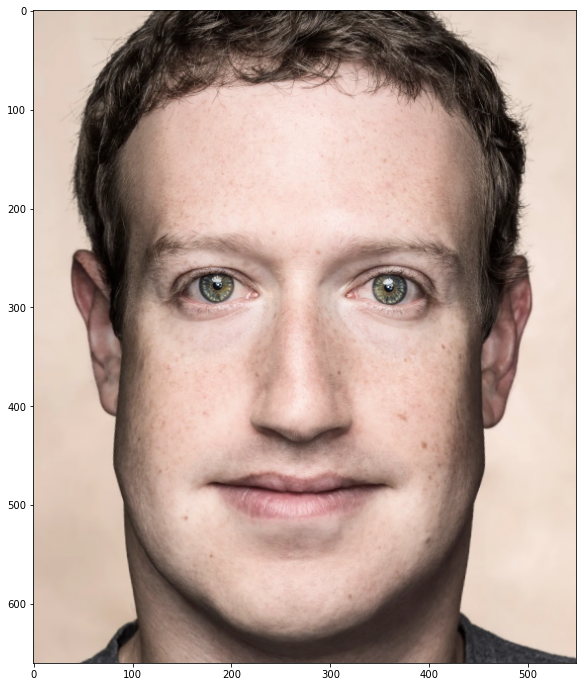

In [41]:
zucc_mouth_specs = {
    53: (-45, 0.5),
    54: (0, 0.9),
    64: (0, 0.9),
    55: (45, 0.5),
    48: (-180, 0.9),
    60: (-180, 0.9),
    49: (-135, 0.5),
    59: (135, 0.5),
    52: (-30, 0.5),
    56: (30, 0.5),
    57: (90, 0.3),
    51: (-90, 0.2),

    #Adding this for mouth length:
    50: (-150, 0.5),
    58: (150, 0.5)
}

zucc_bottom_face_specs = {
            "LOWER_TEMPLE_L": (170, 0.4),
            "LOWER_TEMPLE_R": (10, 0.4),
            "UPPERMOST_CHEEK_L": (160, 1),
            "UPPERMOST_CHEEK_R": (20, 1),
            "UPPER_CHEEK_L": (150, 1),
            "UPPER_CHEEK_R": (30, 1),
            "LOWER_CHEEK_L": (140, 1),
            "LOWER_CHEEK_R": (40, 1),
            "LOWERMOST_CHEEK_L": (130, 0.8),
            "LOWERMOST_CHEEK_R": (50, 0.8),
            "CHIN_L": (120, 0.7),
            "CHIN_R": (60, 0.7),
            "CHIN": (90, 0.7),
}

# 3 diff things here for zucc, mouth, bottom face, and both
mouth_width_bigger = Lambda(scale=0.1, specs=zucc_mouth_specs)
mouth_width_smaller = Lambda(scale= -0.1, specs=zucc_mouth_specs)
bottom_face_chubby = Lambda(scale = 0.12, specs = zucc_bottom_face_specs)
pipe = Pipeline([mouth_width_bigger, bottom_face_chubby])
mult = Multiple(pipe)

new_lf, _ = mult.perform(lf)
new_lf.plot(show_landmarks=False, show_numbers=False)


# wont use triangulation, these are affine transforms with a scale
# because when i used delaunay i had a goal of going from T1 to T2, but here no T2
# so i just used affine transform to a reference space where i do my shit